In [5]:
%pip install matplotlib numpy pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\GBP17\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [18]:
plt.ion()  # Enables interactive mode for matplotlib
plt.style.use('seaborn-v0_8-whitegrid')
plt.rc('text', usetex=False)
plt.rc('font', family='sans-serif')
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('font', size=12)

### Funciones y Argumentos Clave

#### `pd.read_csv(filepath_or_buffer, **kwargs)`
Lee un archivo de valores separados por comas (CSV) en un DataFrame. Los argumentos comunes incluyen:

- **`filepath_or_buffer`**: La ruta al archivo CSV (por ejemplo, `'educ_figdp_1_Data.csv'`).
- **`sep`**: El delimitador a usar (por defecto es `','`).
- **`na_values`**: Cadenas adicionales para reconocer como NA/NaN (por ejemplo, `na_values=':'`).
- **`usecols`**: Una lista de nombres de columnas a leer (por ejemplo, `usecols=['TIME', 'GEO', 'Value']`).
- **`dtype`**: Tipo de dato para los datos o columnas (por ejemplo, `dtype={'Value': float}`).
- **`header`**: Número(s) de fila(s) a usar como nombres de columna (por defecto es `0`).
- **`index_col`**: Columna(s) a establecer como índice (por defecto es `None`).
- **`skiprows`**: Números de línea a omitir al inicio del archivo (por defecto es `None`).
- **`nrows`**: Número de filas a leer (por defecto es `None`).
- **`encoding`**: Codificación a usar para UTF al leer (por ejemplo, `encoding='utf-8'`).

In [8]:
ruta = 'educ_figdp_1_Data.csv'
edu = pd.read_csv(ruta, na_values=':', usecols=['TIME', 'GEO', 'Value'])
print(edu.head())

   TIME                            GEO  Value
0  2000  European Union (28 countries)    NaN
1  2001  European Union (28 countries)    NaN
2  2002  European Union (28 countries)   5.00
3  2003  European Union (28 countries)   5.03
4  2004  European Union (28 countries)   4.95


### Propiedades útiles de un DataFrame en pandas

#### `edu.columns`
Devuelve las etiquetas de las columnas del DataFrame como un objeto `Index`. Esto es útil para inspeccionar o modificar los nombres de las columnas.

#### `edu.index`
Devuelve las etiquetas de los índices (filas) del DataFrame como un objeto `Index`. Esto permite ver o modificar cómo se identifican las filas.

#### `edu.dtypes`
Devuelve los tipos de datos de cada columna del DataFrame como un objeto `Series`. Esto es útil para entender qué tipo de datos contiene cada columna (por ejemplo, `int64`, `float64`, `object`, etc.).

In [7]:
print(edu.columns)
print(edu.index)
print(edu.dtypes)

Index(['TIME', 'GEO', 'Value'], dtype='object')
RangeIndex(start=0, stop=384, step=1)
TIME       int64
GEO       object
Value    float64
dtype: object


#### `edu.describe()`
Este método genera estadísticas descriptivas para las columnas numéricas del DataFrame `edu`. Proporciona información como:

- **`count`**: Número de valores no nulos.
- **`mean`**: Promedio de los valores.
- **`std`**: Desviación estándar.
- **`min`**: Valor mínimo.
- **`25%`**, **`50%`**, **`75%`**: Percentiles (cuartiles).
- **`max`**: Valor máximo.

Esto es útil para obtener una visión general de los datos numéricos en el DataFrame.

In [8]:
edu.describe()

,TIME,Value
count,384.000000,361.000000
mean,2005.500000,5.203989
std,3.456556,1.021694
min,2000.000000,2.880000
25%,2002.750000,4.620000
50%,2005.500000,5.060000
75%,2008.250000,5.660000
max,2011.000000,8.810000


### Exploración de la columna `Value` del DataFrame `edu`

En esta celda, se accede a la columna `Value` del DataFrame `edu`. Esto devuelve una Serie de pandas que contiene los valores de la columna `Value`. Es útil para realizar análisis específicos sobre esta columna, como calcular estadísticas, filtrar valores o visualizar los datos.

#### Ejemplo de salida:
La columna `Value` contiene datos numéricos (tipo `float64`) que representan valores asociados a cada combinación de `TIME` y `GEO`. Algunos valores pueden ser `NaN` debido a datos faltantes.

In [10]:
edu['Value']

0       NaN
1       NaN
2      5.00
3      5.03
4      4.95
       ... 
379    5.90
380    6.10
381    6.81
382    6.85
383    6.76
Name: Value, Length: 384, dtype: float64

In [12]:
edu[10:14]

,TIME,GEO,Value
10,2010,European Union (28 countries),5.41
11,2011,European Union (28 countries),5.25
12,2000,European Union (27 countries),4.91
13,2001,European Union (27 countries),4.99


In [13]:
edu.loc[90:92, ['TIME', 'GEO']]

,TIME,GEO
90,2006,Belgium
91,2007,Belgium
92,2008,Belgium


In [ ]:
# edu[edu['Value'] > 6.5].tail()
edu[edu['Value'].isnull()].head()

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
36,2000,Euro area (18 countries),NaN
37,2001,Euro area (18 countries),NaN
48,2000,Euro area (17 countries),NaN


### Uso del método `max()` en el DataFrame `edu`

El código presentado utiliza el método `max()` de pandas para calcular los valores máximos en el DataFrame `edu`. A continuación, se describe su funcionamiento:

#### `edu.max(axis=0)`
- **Descripción**: Calcula el valor máximo para cada columna del DataFrame `edu`.
- **`axis=0`**: Indica que la operación se realiza a lo largo de las filas, es decir, se calcula el máximo por columna.
- **Salida esperada**: Devuelve una Serie con los valores máximos de cada columna.

#### `edu.max(axis=1)`
- **Descripción**: Calcula el valor máximo para cada fila del DataFrame `edu`.
- **`axis=1`**: Indica que la operación se realiza a lo largo de las columnas, es decir, se calcula el máximo por fila.
- **Salida esperada**: Devuelve una Serie con los valores máximos de cada fila.

#### Ejemplo de salida:
- Para `axis=0`, se obtendrán los valores máximos de las columnas `TIME`, `GEO` y `Value`.
- Para `axis=1`, se obtendrá el valor máximo en cada fila considerando las columnas numéricas y de texto (en este caso, las cadenas de texto se comparan alfabéticamente).

Este análisis es útil para identificar los valores extremos en el DataFrame, ya sea por columna o por fila.

In [23]:
print('axis = 0')
print(edu.max(axis=0))

# print('axis = 1')
# print(edu.max(axis=1))

axis = 0
TIME      2011
GEO      Spain
Value     8.81
dtype: object


In [24]:
print('Pandas max function', edu['Value'].max())
print('Python max function', max(edu['Value']))

Pandas max function 8.81
Python max function nan


In [25]:
s = edu['Value'] / 100
s.head()

0       NaN
1       NaN
2    0.0500
3    0.0503
4    0.0495
Name: Value, dtype: float64

In [28]:
# s = edu['Value'].apply(lambda x: x / 100)
s = edu['Value'].apply(lambda x: np.sqrt(x))
s.head()

0         NaN
1         NaN
2    2.236068
3    2.242766
4    2.224860
Name: Value, dtype: float64

In [29]:
edu['ValueNorm'] = edu['Value'] / edu['Value'].max()
edu.tail()

,TIME,GEO,Value,ValueNorm
379,2007,Finland,5.90,0.669694
380,2008,Finland,6.10,0.692395
381,2009,Finland,6.81,0.772985
382,2010,Finland,6.85,0.777526
383,2011,Finland,6.76,0.767310


### Eliminación de la columna `ValueNorm` del DataFrame `edu`

El código presentado realiza las siguientes acciones:

1. **`edu.drop(columns=['ValueNorm'], axis=1, inplace=True)`**:
    - **Descripción**: Elimina la columna `ValueNorm` del DataFrame `edu`.
    - **`columns=['ValueNorm']`**: Especifica que se debe eliminar la columna llamada `ValueNorm`.
    - **`axis=1`**: Indica que la operación se realiza a lo largo de las columnas.
    - **`inplace=True`**: Modifica el DataFrame original `edu` directamente, sin necesidad de asignar el resultado a una nueva variable.

In [30]:
edu.drop(columns=['ValueNorm'], axis=1, inplace=True)
edu.head()

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95


### Concatenación de DataFrames con `pd.concat`

El código presentado utiliza la función `pd.concat` de pandas para combinar dos DataFrames (`edu` y `df1`) en un único DataFrame. A continuación, se describe su funcionamiento:

#### `edu = pd.concat([edu, df1], ignore_index=True)`
- **Descripción**: Combina el DataFrame `edu` con el DataFrame `df1` y asigna el resultado al DataFrame `edu`.
- **`[edu, df1]`**: Lista de DataFrames a concatenar. En este caso, se concatenan `edu` y `df1`.
- **`ignore_index=True`**: Ignora los índices originales de los DataFrames y genera un nuevo índice secuencial para el DataFrame resultante.
- **Resultado**: El DataFrame `edu` se actualiza para incluir las filas del DataFrame `df1`.

Si se establece `ignore_index=False`, los índices originales de los DataFrames `edu` y `df1` se conservarán en el DataFrame resultante. Esto puede dar lugar a índices duplicados si ambos DataFrames tienen índices que se solapan. Por ejemplo, si `df1` tiene un índice `0` y `edu` también tiene un índice `0`, el DataFrame resultante tendrá dos filas con índice `0`.

In [33]:
df1 = pd.DataFrame({'TIME': [2000], 'Value': [5.00], 'GEO': ['a']})
edu = pd.concat([edu, df1], ignore_index=True)
edu.tail()

,TIME,GEO,Value
382,2010,Finland,6.85
383,2011,Finland,6.76
384,2000,a,5.00
385,2000,a,5.00
386,2000,a,5.00


In [36]:
edu.drop(index=edu.index[-1], inplace=True)
edu.tail()

,TIME,GEO,Value
379,2007,Finland,5.90
380,2008,Finland,6.10
381,2009,Finland,6.81
382,2010,Finland,6.85
383,2011,Finland,6.76


In [37]:
edu['Value'].isnull()

0       True
1       True
2      False
3      False
4      False
       ...  
379    False
380    False
381    False
382    False
383    False
Name: Value, Length: 384, dtype: bool

### Eliminación de Filas con Valores Nulos en la Columna `Value`

El código presentado utiliza el método `dropna` de pandas para eliminar las filas del DataFrame `edu` que contienen valores nulos (`NaN`) en la columna `Value`. A continuación, se describe su funcionamiento:

#### `eduDrop = edu.dropna(how='any', subset=['Value'], axis=0)`
- **Descripción**: Crea un nuevo DataFrame `eduDrop` eliminando las filas de `edu` donde la columna `Value` tiene valores nulos.
- **`how='any'`**: Especifica que se deben eliminar las filas si **cualquier** valor en las columnas seleccionadas (`subset`) es nulo.
- **`subset=['Value']`**: Indica que solo se debe considerar la columna `Value` para determinar si una fila debe eliminarse.
- **`axis=0`**: Especifica que la operación se realiza a lo largo de las filas.
- **Resultado**: El DataFrame `eduDrop` contiene únicamente las filas de `edu` donde la columna `Value` no tiene valores nulos.

#### Ejemplo de Salida:
El DataFrame resultante `eduDrop` tiene 361 filas y 3 columnas, ya que se eliminaron las filas con valores nulos en la columna `Value`. Esto es útil para realizar análisis o visualizaciones en datos completos sin valores faltantes.

In [38]:
eduDrop = edu.dropna(how='any', subset=['Value'], axis=0)
eduDrop.head()

,TIME,GEO,Value
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95
5,2005,European Union (28 countries),4.92
6,2006,European Union (28 countries),4.91


### Método `fillna` en pandas

El método `fillna` se utiliza para rellenar valores nulos (`NaN`) en un DataFrame o Serie con un valor específico o utilizando una estrategia definida. En el caso del código:

```python
eduFilled = edu.fillna(value={'Value': 0})
```

#### Descripción:
- **`edu.fillna(value={'Value': 0})`**:
    - **`value={'Value': 0}`**: Especifica un diccionario donde la clave es el nombre de la columna (`Value`) y el valor es el que se usará para reemplazar los valores nulos en esa columna (`0` en este caso).
    - **Resultado**: Se crea un nuevo DataFrame `eduFilled` donde los valores nulos en la columna `Value` del DataFrame `edu` han sido reemplazados por `0`.

#### Otros argumentos del método `fillna`:
1. **`value`**: 
     - Puede ser un escalar, un diccionario o una Serie que especifique los valores con los que se reemplazarán los nulos.
     - Ejemplo: `df.fillna(value=0)` o `df.fillna(value={'col1': 0, 'col2': 1})`.

2. **`method`**:
     - Método para rellenar valores nulos.
     - Opciones: `'ffill'` (rellena hacia adelante), `'bfill'` (rellena hacia atrás).
     - Ejemplo: `df.fillna(method='ffill')`.

3. **`axis`**:
     - Especifica si la operación se realiza por filas (`axis=0`) o por columnas (`axis=1`).
     - Por defecto: `axis=0`.

4. **`inplace`**:
     - Si es `True`, modifica el DataFrame original en lugar de devolver una copia.
     - Por defecto: `False`.

5. **`limit`**:
     - Número máximo de valores consecutivos nulos a rellenar.
     - Ejemplo: `df.fillna(method='ffill', limit=2)`.

6. **`downcast`**:
     - Permite convertir el tipo de datos del resultado a un tipo más específico si es posible.
     - Ejemplo: `df.fillna(value=0, downcast='int')`.

#### Ejemplo adicional:
```python
# Rellenar valores nulos con el promedio de la columna
eduFilled = edu.fillna(value={'Value': edu['Value'].mean()})
```

In [41]:
eduFilled = edu.fillna(value={'Value': 0})
eduFilled.head()

,TIME,GEO,Value
0,2000,European Union (28 countries),0.00
1,2001,European Union (28 countries),0.00
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95


### Ordenamiento del DataFrame `edu` por la columna `Value`

El código presentado utiliza el método `sort_values` de pandas para ordenar el DataFrame `edu` en función de los valores de la columna `Value`. A continuación, se describe su funcionamiento:

#### `edu.sort_values(by='Value', ascending=False, inplace=True)`
- **`by='Value'`**: Especifica la columna `Value` como el criterio de ordenamiento.
- **`ascending=False`**: Indica que el ordenamiento debe ser descendente (de mayor a menor).
- **`inplace=True`**: Modifica el DataFrame original `edu` directamente, sin necesidad de asignar el resultado a una nueva variable.

#### Resultado:
El DataFrame `edu` se reorganiza de manera que las filas con los valores más altos en la columna `Value` aparecen primero. Las filas con valores nulos (`NaN`) en la columna `Value` se colocan al final del DataFrame.

#### Ejemplo de uso:
Este ordenamiento es útil para identificar rápidamente las filas con los valores más altos en la columna `Value`, como los países o años con los mayores valores registrados.

In [42]:
edu.sort_values(by='Value', ascending=False, inplace=True)
edu.head()

,TIME,GEO,Value
130,2010,Denmark,8.81
131,2011,Denmark,8.75
129,2009,Denmark,8.74
122,2002,Denmark,8.44
121,2001,Denmark,8.44


In [45]:
edu.sort_index(ascending=True, inplace=True) # axis=0
edu.head()

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95


In [46]:
group = edu[['GEO', 'Value']].groupby('GEO').mean()
group.head()

,Value
GEO,
Austria,5.618333
Belgium,6.189091
Bulgaria,4.093333
Cyprus,7.023333
Czech Republic,4.168333


### Creación de una Tabla Dinámica con `pd.pivot_table`

El código presentado utiliza la función `pd.pivot_table` de pandas para crear una tabla dinámica a partir del DataFrame `filtered_data`. A continuación, se describe su funcionamiento:

#### `pivedu = pd.pivot_table(filtered_data, index='GEO', columns='TIME', values='Value', aggfunc='mean')`
- **`filtered_data`**: DataFrame de entrada que contiene los datos filtrados.
- **`index='GEO'`**: Especifica que las filas de la tabla dinámica estarán indexadas por los valores únicos de la columna `GEO`.
- **`columns='TIME'`**: Define que las columnas de la tabla dinámica estarán basadas en los valores únicos de la columna `TIME`.
- **`values='Value'`**: Indica que los valores de la tabla dinámica provendrán de la columna `Value`.
- **`aggfunc='mean'`**: Especifica que se calculará el promedio (`mean`) de los valores en caso de que haya múltiples entradas para una combinación de `GEO` y `TIME`.

#### Resultado:
El DataFrame `pivedu` es una tabla dinámica donde:
- Cada fila representa un país o región (`GEO`).
- Cada columna representa un año (`TIME`).
- Las celdas contienen el promedio de los valores (`Value`) para cada combinación de `GEO` y `TIME`.

#### Ejemplo de uso:
Este tipo de tabla es útil para analizar tendencias temporales de los valores por país o región, facilitando la comparación entre diferentes períodos de tiempo.

#### Argumentos de `pd.pivot_table`

**Argumentos obligatorios:**
- **`data`**: El DataFrame de entrada.

**Argumentos opcionales:**
- **`values`**: Columnas a agregar en la tabla dinámica.
- **`index`**: Columnas a usar como índices de las filas.
- **`columns`**: Columnas a usar como encabezados de las columnas.
- **`aggfunc`**: Función de agregación (por defecto es `'mean'`).
- **`fill_value`**: Valor para reemplazar valores nulos en la tabla dinámica.
- **`margins`**: Si es `True`, agrega totales para filas y columnas (por defecto es `False`).
- **`dropna`**: Si es `True`, elimina columnas con todos valores nulos (por defecto es `True`).
- **`margins_name`**: Nombre de la fila/columna de totales (por defecto es `'All'`).
- **`observed`**: Si es `True`, solo muestra combinaciones observadas de categorías (por defecto es `False`).
- **`sort`**: Si es `True`, ordena las categorías en el resultado (por defecto es `True`).

In [9]:
filtered_data = edu[edu['TIME'] > 2005]
pivedu = pd.pivot_table(filtered_data, index='GEO', columns='TIME', values='Value', aggfunc='mean')
pivedu.head()

TIME,2006,2007,2008,2009,2010,2011
GEO,,,,,,
Austria,5.40,5.33,5.47,5.98,5.91,5.80
Belgium,5.98,6.00,6.43,6.57,6.58,6.55
Bulgaria,4.04,3.88,4.44,4.58,4.10,3.82
Cyprus,7.02,6.95,7.45,7.98,7.92,7.87
Czech Republic,4.42,4.05,3.92,4.36,4.25,4.51


In [59]:
pivedu.loc[['Spain', 'Italy'], [2006, 2011]]

TIME,2006,2011
GEO,,
Spain,4.26,4.82
Italy,4.67,4.29


### Limpieza y Transformación del DataFrame `pivedu`

El código presentado realiza varias operaciones de limpieza y transformación en el DataFrame `pivedu`. A continuación, se describe cada paso:

#### 1. Eliminación de Filas Específicas
```python
pivedu = pivedu.drop(['Euro area (13 countries)',
                      'Euro area (15 countries)',
                      'Euro area (17 countries)',
                      'Euro area (18 countries)',
                      'European Union (25 countries)',
                      'European Union (27 countries)',
                      'European Union (28 countries)'], axis=0)
```
- **Descripción**: Se eliminan las filas correspondientes a regiones agregadas (como "Euro area" y "European Union") que no representan países individuales.
- **`axis=0`**: Indica que la operación se realiza a lo largo de las filas.
- **Resultado**: El DataFrame `pivedu` contiene únicamente datos de países individuales.

#### 2. Renombrar Índices
```python
pivedu = pivedu.rename(index={'Germany (until 1990 former territory of the FRG)': 'Germany'})
```
- **Descripción**: Se renombra el índice correspondiente a Alemania para simplificar su nombre.
- **`index`**: Especifica los índices a renombrar mediante un diccionario donde la clave es el nombre original y el valor es el nuevo nombre.
- **Resultado**: El índice "Germany (until 1990 former territory of the FRG)" se reemplaza por "Germany".

#### 3. Eliminación de Filas con Valores Nulos
```python
pivedu = pivedu.dropna()
```
- **Descripción**: Se eliminan las filas que contienen valores nulos (`NaN`) en cualquier columna.
- **Resultado**: El DataFrame `pivedu` queda limpio de valores faltantes.

#### 4. Ranking de Valores
```python
pivedu.rank(ascending=False, method='first').head()
```
- **Descripción**: Se calcula el ranking de los valores en el DataFrame `pivedu`.
  - **`ascending=False`**: El ranking se realiza en orden descendente (de mayor a menor).
  - **`method='first'`**: En caso de empates, se asigna el ranking según el orden de aparición en el DataFrame.
- **Resultado**: Devuelve un DataFrame con los rankings de los valores en `pivedu`.

#### Propósito General
Este código es útil para limpiar y preparar los datos del DataFrame `pivedu`, eliminando información redundante o irrelevante, renombrando índices para mayor claridad, y calculando rankings para análisis posteriores.

In [ ]:
pivedu = pivedu.drop(['Euro area (13 countries)',
                    'Euro area (15 countries)',
                    'Euro area (17 countries)',
                    'Euro area (18 countries)',
                    'European Union (25 countries)',
                    'European Union (27 countries)',
                    'European Union (28 countries)'], axis=0)

pivedu = pivedu.rename(index={'Germany (until 1990 former territory of the FRG)': 'Germany'})
pivedu = pivedu.dropna()
pivedu.rank(ascending=False, method='first').head()

TIME,2006,2007,2008,2009,2010,2011
GEO,,,,,,
Austria,10.0,7.0,11.0,7.0,8.0,8.0
Belgium,5.0,4.0,3.0,4.0,5.0,5.0
Bulgaria,21.0,21.0,20.0,20.0,22.0,22.0
Cyprus,2.0,2.0,2.0,2.0,2.0,3.0
Czech Republic,19.0,20.0,21.0,21.0,20.0,19.0


In [ ]:
totalSum = pivedu.sum(axis=1)
totalSum.rank(ascending=False, method='dense').sort_values().head()

GEO
Denmark    1.0
Cyprus     2.0
Finland    3.0
Malta      4.0
Belgium    5.0
dtype: float64

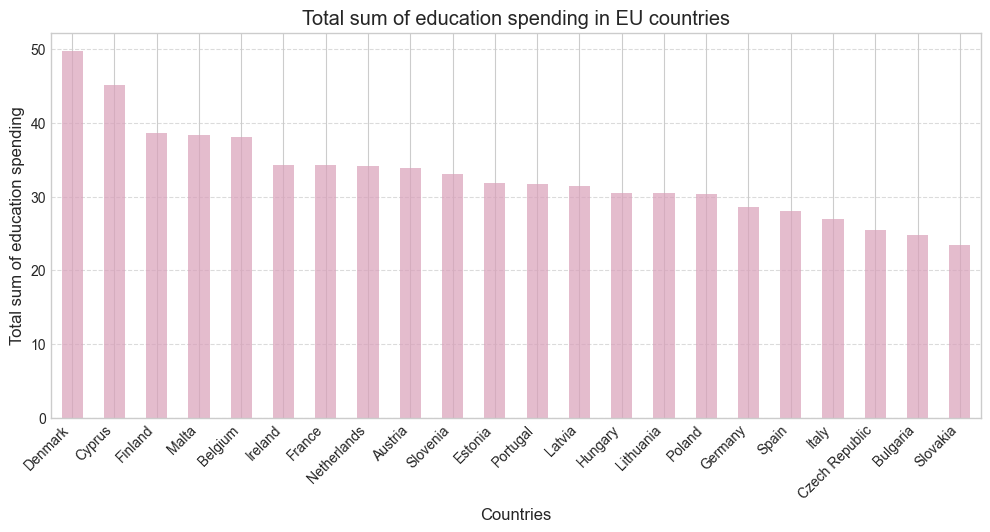

In [23]:
fig = plt.figure(figsize=(12, 5), dpi=100)
totalSum = pivedu.sum(axis=1).sort_values(ascending=False)
totalSum.plot(kind='bar', color='#d9a0b9', alpha=0.7, title='Total sum of education spending in EU countries')
plt.xlabel('Countries')
plt.ylabel('Total sum of education spending')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.savefig('educ_figdp_1.png', dpi=100, bbox_inches='tight')

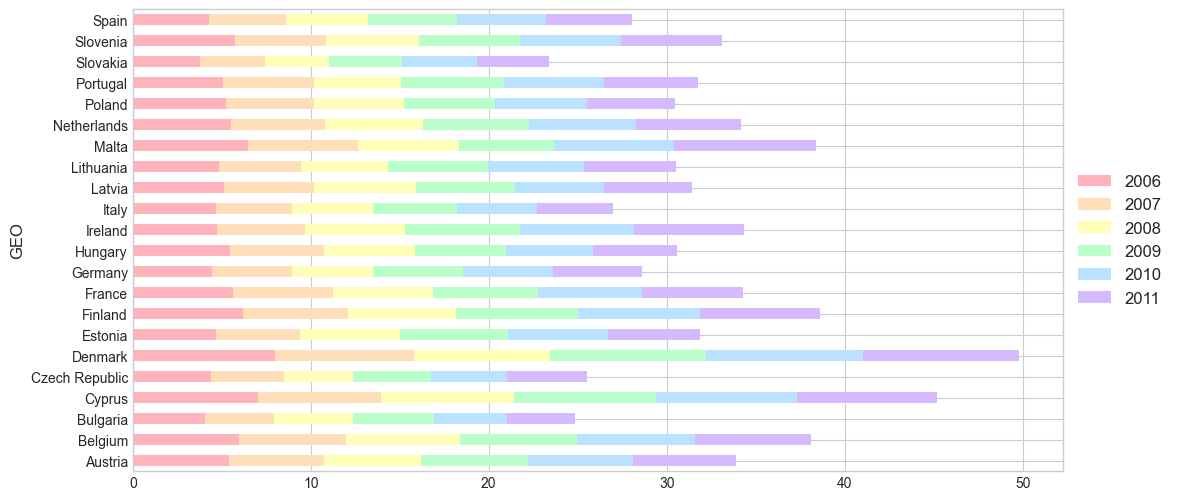

In [24]:
my_colors = ['#FFB3BA', '#FFDFBA', '#FFFFBA', '#BAFFC9', '#BAE1FF', '#D5BAFF']
ax = pivedu.plot(kind='barh', stacked=True, color=my_colors, figsize=(12, 6))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('Value_Time_Country.png', dpi=300, bbox_inches='tight')